# 5.8 


# 1) 문제정의

최근접 쌍의 거리 문제를 억지기법이 아닌 분할 정복 기법으로 만든 알고리즘으로 사용한다.

# 2) 알고리즘 설명


분할 정복 기법을 기반으로 하며 각 부분에서 최근접 쌍을 찾은 다음 부분해를 통합하여 전체적인 최근접 쌍을 찾는 방법이다.

1. Pm의 모든 점을 y좌표를 기준으로 오름차순으로 정렬한다.
2. dcross는 d로 초기화한다. d보다 더 큰 값이 나오는 건 의미가 없다.
3. y 값을 기준으로 가장 작은 점 Pi를 시작점으로 잡는다.

# 3) 손으로 푼 예제

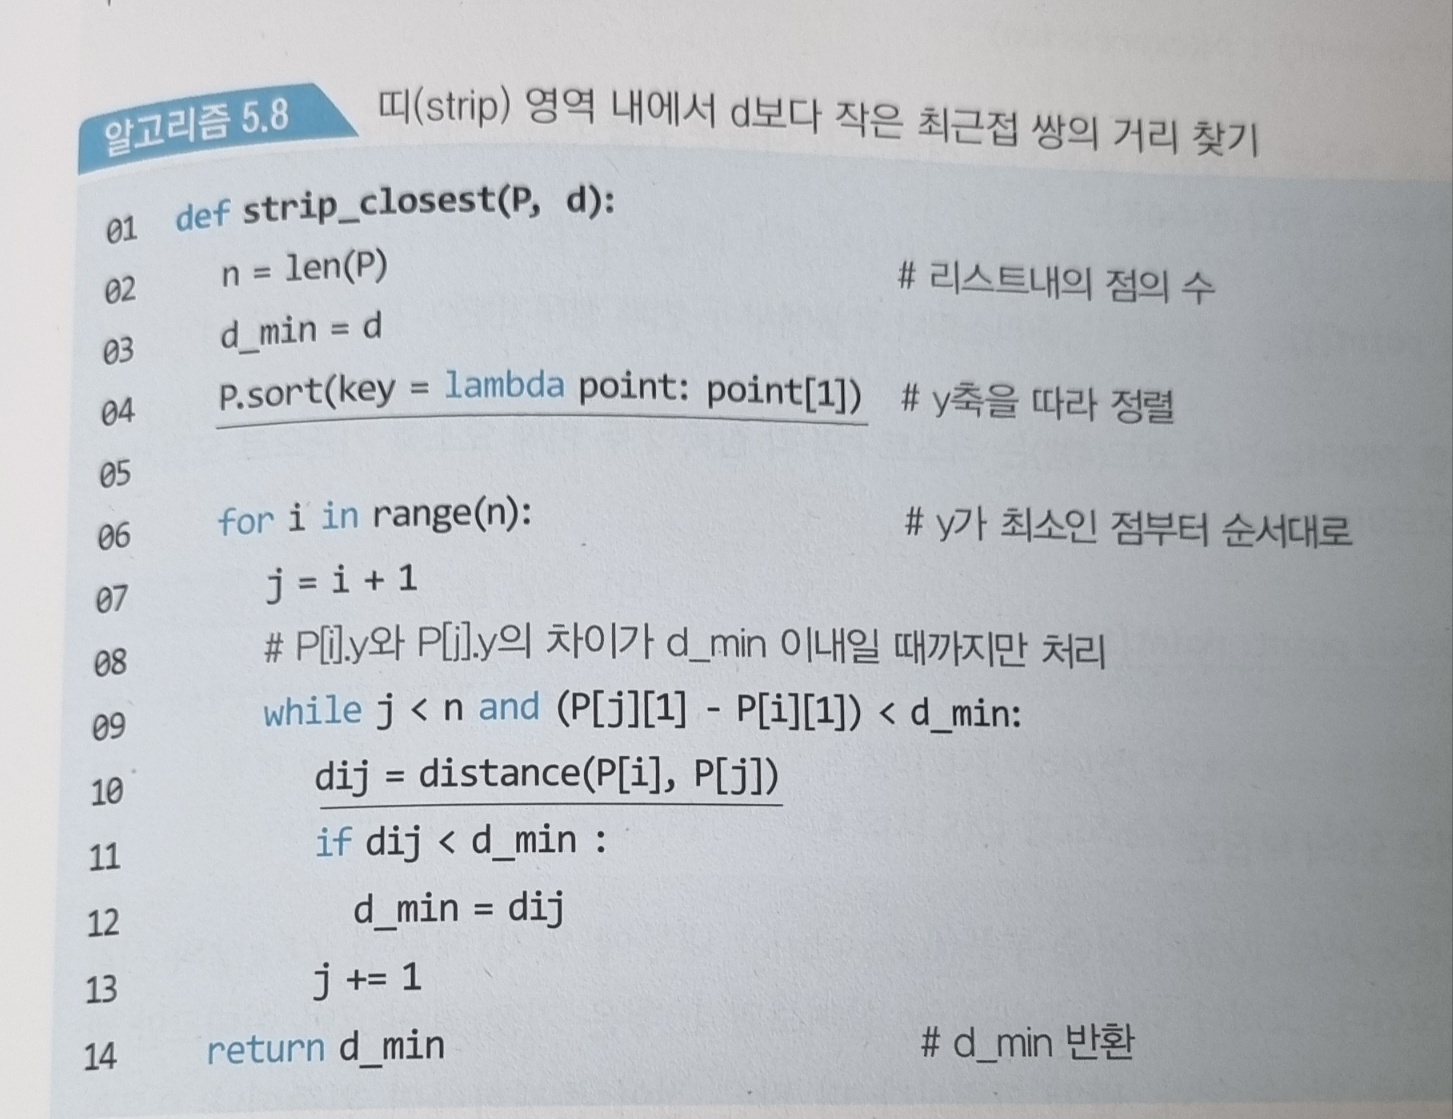

# 4) 코드개요

1. 점들을 x좌표를 기준으로 정렬한다.
2. 분할 정복 알고리즘을 사용하여 띠(strip) 영역을 정의하고 띠 영역 내에서 최근접 쌍의 거리를 찾는다.

# 5) 알고리즘 코드

In [5]:
def strip_closest(P, d):
    n = len(P)
    d_min = d
    P.sort(key = lambda point: point[1])

    for i in range(n):
        j = i + 1

        while j < n and (P[j][1] - P[i][1]) < d_min:
            dij = distance(P[i], P[j])
            if dij < d_min :
                d_min = dij
            j += 1
    return d_min

# 6) 테스트 코드

In [9]:
import math

def closest_pair_strip(strip, d):
    min_dist = d
    strip.sort(key=lambda point: point[1])

    for i in range(len(strip)):
        j = i + 1
        while j < len(strip) and (strip[j][1] - strip[i][1]) < min_dist:
            min_dist = min(min_dist, distance(strip[i], strip[j]))
            j += 1
    
    return min_dist

def closest_pair(points):
    points.sort()
    return closest_pair_util(points)

def closest_pair_util(points):
    if len(points) <= 3:
        return brute_force_closest_pair(points)
    
    mid = len(points) // 2
    left_part = points[:mid]
    right_part = points[mid:]

    left_min = closest_pair_util(left_part)
    right_min = closest_pair_util(right_part)

    min_dist = min(left_min, right_min)

    strip = []
    for point in points:
        if abs(point[0] - points[mid][0]) < min_dist:
            strip.append(point)

    return min(min_dist, closest_pair_strip(strip, min_dist))

def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def brute_force_closest_pair(points):
    min_dist = float('inf')
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            min_dist = min(min_dist, distance(points[i], points[j]))
    return min_dist

# Example usage:
points = [(2, 3), (12, 30), (40, 50), (5, 1), (12, 10), (3, 4)]
print("Closest pair distance:", closest_pair(points))

Closest pair distance: 1.4142135623730951


# 7) 수행 결과

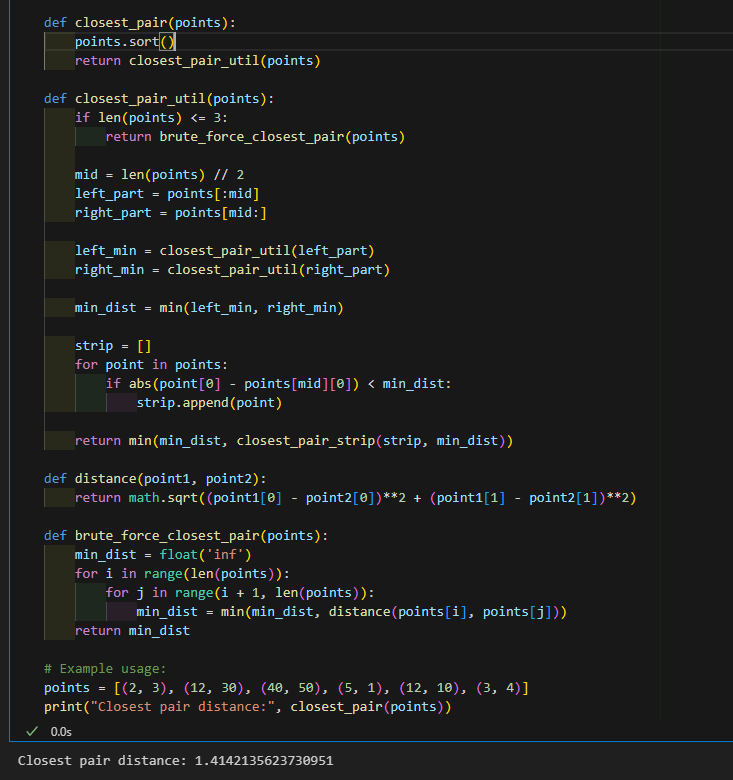

# 8) 복잡도 분석

1. 최근접 점 쌍 문제를 다양한 알고리즘으로 한다. 브루트 포스 방법을 사용하면 O(n^2)의 시간 복잡도를 가지지만 분할 정복 알고리즘을 사용하면 O(n log n)의 시간 복잡도를 가진다.

2. 분할 정복을 이용한 최근접 점 쌍 찾기 알고리즘이 있다. 이 알고리즘의 시간 복잡도는 O(log n)이다.
3. 분할 정복 알고리즘을 사용하면 효율적으로 가장 가까운 두 점을 찾을 수 있다.

# 9) 조별 협력 내용(상호지도)